# DSCI 691 Capstone Project
## Decoding Crime in NYC
## Team: Safe City

# 3. NYC crime data EDA

In [1]:
import numpy as np, pandas as pd

#note some plots are commented out in order to fit file within GitHub size limits

In [2]:
df = pd.read_csv('ny_fin.csv')

/Users/joshlister/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (17,18,29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,ofns_desc,crm_atpt_cptd_cd,law_cat_cd,boro_nm,loc_of_occur_desc,prem_typ_desc,susp_age_group,...,DAY_OF_WEEK,MONTH,HOUR,Season,Number,Street,City,State,Zip,Country
0,932184137,2016-01-01 00:00:00,2021-11-11 00:00:00,SEX CRIMES,COMPLETED,FELONY,MANHATTAN,INSIDE,RESIDENCE - APT. HOUSE,45-64,...,Thu,1,0,Winter,4295,Broadway,New York,NY,10033,US
1,506003829,2016-01-01 00:00:00,2021-11-11 21:00:00,SEX CRIMES,COMPLETED,MISDEMEANOR,MANHATTAN,INSIDE,RESIDENCE - APT. HOUSE,25-44,...,Thu,1,21,Winter,321,East 5th Street,New York,NY,10003,US
2,614924322,2016-01-01 00:00:00,2021-11-11 00:01:00,GRAND LARCENY,COMPLETED,FELONY,MANHATTAN,INSIDE,BANK,UNKNOWN,...,Thu,1,0,Winter,100,Park Avenue,New York,NY,10016,US
3,405538879,2016-01-01 00:00:00,2021-11-11 17:00:00,OFF. AGNST PUB ORD SENSBLTY &,COMPLETED,MISDEMEANOR,MANHATTAN,INSIDE,RESIDENCE - APT. HOUSE,UNKNOWN,...,Thu,1,17,Winter,400,West 59th Street,New York,NY,10019,US
4,983297347,2016-01-01 00:00:00,2021-11-11 08:00:00,SEX CRIMES,ATTEMPTED,FELONY,MANHATTAN,INSIDE,RESIDENCE - PUBLIC HOUSING,UNKNOWN,...,Thu,1,8,Winter,162,East 102nd Street,New York,NY,10029,US


In [4]:
df.columns

Index(['cmplnt_num', 'cmplnt_fr_dt', 'cmplnt_fr_tm', 'ofns_desc',
       'crm_atpt_cptd_cd', 'law_cat_cd', 'boro_nm', 'loc_of_occur_desc',
       'prem_typ_desc', 'susp_age_group', 'susp_race', 'susp_sex', 'latitude',
       'longitude', 'vic_age_group', 'vic_race', 'vic_sex', 'station_name',
       'parks_nm', 'YEAR', 'DAY', 'DAY_OF_WEEK', 'MONTH', 'HOUR', 'Season',
       'Number', 'Street', 'City', 'State', 'Zip', 'Country'],
      dtype='object')

In [5]:
df.groupby('Street').count()['cmplnt_num'].sort_values()

Street
Beach 209th Street        1
Laurie Avenue             1
Grove Court               1
Guilford Street           1
Sniffen Court             1
                      ...  
Fulton Street         13833
8th Avenue            14148
5th Avenue            18850
3rd Avenue            28248
Broadway              54203
Name: cmplnt_num, Length: 7156, dtype: int64

In [6]:
new_df = df[['YEAR', 'DAY_OF_WEEK', 'MONTH', 'Season', 'law_cat_cd', 'ofns_desc', 'HOUR', 'Number', 'Street', 'latitude', 'longitude']]

In [7]:
new_df

,YEAR,DAY_OF_WEEK,MONTH,Season,law_cat_cd,ofns_desc,HOUR,Number,Street,latitude,longitude
0,2016,Thu,1,Winter,FELONY,SEX CRIMES,0,4295,Broadway,40.851488,-73.935458
1,2016,Thu,1,Winter,MISDEMEANOR,SEX CRIMES,21,321,East 5th Street,40.726554,-73.987828
2,2016,Thu,1,Winter,FELONY,GRAND LARCENY,0,100,Park Avenue,40.751192,-73.978357
3,2016,Thu,1,Winter,MISDEMEANOR,OFF. AGNST PUB ORD SENSBLTY &,17,400,West 59th Street,40.768919,-73.984990
4,2016,Thu,1,Winter,FELONY,SEX CRIMES,8,162,East 102nd Street,40.789260,-73.947710
...,...,...,...,...,...,...,...,...,...,...,...
2261486,2020,Wed,12,Winter,MISDEMEANOR,INTOXICATED & IMPAIRED DRIVING,3,116,Main Street,40.511804,-74.250035
2261487,2020,Wed,12,Winter,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,23,33,South Street,40.633520,-74.115632
2261488,2020,Wed,12,Winter,MISDEMEANOR,PETIT LARCENY,14,24,Bay Street,40.641738,-74.075678
2261489,2020,Wed,12,Winter,FELONY,ROBBERY,11,78,Richmond Terrace,40.644726,-74.077483


In [8]:
new_df.groupby('DAY_OF_WEEK').count()['Street'].sort_values()

DAY_OF_WEEK
Sat    302499
Sun    313034
Mon    321798
Fri    323751
Wed    325089
Tue    331716
Thu    343537
Name: Street, dtype: int64

In [9]:
import plotly.graph_objects as go

x = new_df['DAY_OF_WEEK']
y = new_df['HOUR']
_ = go.Figure(go.Histogram2d(
        x=x,
        y=y))
#_.show()

In [10]:
mis_mask = [i == 'MISDEMEANOR' for i in new_df['law_cat_cd']]

mis_df = new_df[mis_mask]


x = mis_df['DAY_OF_WEEK']
y = mis_df['HOUR']
_ = go.Figure(go.Histogram2d(
        x=x,
        y=y))
#_.show()

In [11]:
fel_mask = [i == 'FELONY' for i in new_df['law_cat_cd']]

fel_df = new_df[fel_mask]

In [12]:
x = fel_df['DAY_OF_WEEK']
y = fel_df['HOUR']
_ = go.Figure(go.Histogram2d(
        x=x,
        y=y))
#_.show()

In [13]:
mask_2016 = [i == 2016 for i in fel_df['YEAR']]
mask_2017 = [i == 2017 for i in fel_df['YEAR']]
mask_2018 = [i == 2018 for i in fel_df['YEAR']]
mask_2019 = [i == 2019 for i in fel_df['YEAR']]
mask_2020 = [i == 2020 for i in fel_df['YEAR']]

In [14]:
df_2016 = fel_df[mask_2016]
df_2017 = fel_df[mask_2017]
df_2018 = fel_df[mask_2018]
df_2019 = fel_df[mask_2019]
df_2020 = fel_df[mask_2020]

In [15]:
df_lst = [df_2016,df_2017,df_2018,df_2019,df_2020]

In [16]:
import plotly.graph_objects as go
x = df_2016['DAY_OF_WEEK']
y = df_2016['HOUR']
_ = go.Figure(go.Histogram2d(
        x=x,
        y=y
    ))
#_.show()

In [17]:
x = df_2017['DAY_OF_WEEK']
y = df_2017['HOUR']
_ = go.Figure(go.Histogram2d(
        x=x,
        y=y))
#_.show()

In [18]:
x = df_2018['DAY_OF_WEEK']
y = df_2018['HOUR']
_ = go.Figure(go.Histogram2d(
        x=x,
        y=y))
#_.show()

In [19]:
x = df_2019['DAY_OF_WEEK']
y = df_2019['HOUR']
_ = go.Figure(go.Histogram2d(
        x=x,
        y=y))
#_.show()

In [20]:
x = df_2020['DAY_OF_WEEK']
y = df_2020['HOUR']
_ = go.Figure(go.Histogram2d(
        x=x,
        y=y))
#_.show()

In [43]:
x = new_df['DAY_OF_WEEK']
y = new_df['HOUR']
_ = go.Figure(go.Histogram2d(
        x=x,
        y=y))
#_.show()

In [44]:
import plotly.express as px


#fig = px.scatter_mapbox(df_2020, lat=df_2020['latitude'], lon=df_2020['longitude'], hover_name= df_2020['Number'] + ' ' + df_2020['Street'], hover_data=["YEAR", "HOUR"],
                        #color_discrete_sequence=["red"], zoom=10, height=600)
#fig.update_layout(mapbox_style="open-street-map")
#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

#fig.show()

In [23]:
df2 = fel_df.drop(['latitude', 'longitude', 'ofns_desc', 'Number', 'MONTH'], axis =1)
df2 = df2.groupby(df2.columns.tolist(),as_index=False).size()

df2 = df2.rename(columns={'size': 'counts'})

In [24]:
df2

,YEAR,DAY_OF_WEEK,Season,law_cat_cd,HOUR,Street,counts
0,2016,Fri,Fall,FELONY,0,101st Avenue,1
1,2016,Fri,Fall,FELONY,0,102nd Avenue,1
2,2016,Fri,Fall,FELONY,0,103rd Street,2
3,2016,Fri,Fall,FELONY,0,104th Street,1
4,2016,Fri,Fall,FELONY,0,107th Avenue,1
...,...,...,...,...,...,...,...
588251,2020,Wed,Winter,FELONY,23,White Plains Road,1
588252,2020,Wed,Winter,FELONY,23,Wickham Avenue,2
588253,2020,Wed,Winter,FELONY,23,Winchester Boulevard,1
588254,2020,Wed,Winter,FELONY,23,Wortman Avenue,1


In [25]:
df2.sort_values('counts', ascending=False).head(20)
#new_df.sort_values('counts', ascending=False).head(50)

,YEAR,DAY_OF_WEEK,Season,law_cat_cd,HOUR,Street,counts
83237,2016,Thu,Winter,FELONY,0,Broadway,18
87077,2016,Thu,Winter,FELONY,19,Broadway,17
429106,2019,Thu,Fall,FELONY,18,Broadway,16
238121,2017,Wed,Summer,FELONY,17,Broadway,16
535788,2020,Sun,Summer,FELONY,22,Broadway,15
519232,2020,Sat,Summer,FELONY,16,West 10th Street,15
350333,2018,Wed,Spring,FELONY,15,Broadway,15
105320,2016,Tue,Winter,FELONY,18,Broadway,15
538596,2020,Sun,Winter,FELONY,17,Broadway,15
95022,2016,Tue,Spring,FELONY,14,Broadway,15


In [26]:
df_a = df[['cmplnt_fr_dt', 'ofns_desc', 'boro_nm', 'Season', 'YEAR', 'DAY', 'MONTH', 'Number', 'Street', 'City', 'State']]


In [27]:
df_a

,cmplnt_fr_dt,ofns_desc,boro_nm,Season,YEAR,DAY,MONTH,Number,Street,City,State
0,2016-01-01 00:00:00,SEX CRIMES,MANHATTAN,Winter,2016,1,1,4295,Broadway,New York,NY
1,2016-01-01 00:00:00,SEX CRIMES,MANHATTAN,Winter,2016,1,1,321,East 5th Street,New York,NY
2,2016-01-01 00:00:00,GRAND LARCENY,MANHATTAN,Winter,2016,1,1,100,Park Avenue,New York,NY
3,2016-01-01 00:00:00,OFF. AGNST PUB ORD SENSBLTY &,MANHATTAN,Winter,2016,1,1,400,West 59th Street,New York,NY
4,2016-01-01 00:00:00,SEX CRIMES,MANHATTAN,Winter,2016,1,1,162,East 102nd Street,New York,NY
...,...,...,...,...,...,...,...,...,...,...,...
2261486,2020-12-31 00:00:00,INTOXICATED & IMPAIRED DRIVING,STATEN ISLAND,Winter,2020,31,12,116,Main Street,New York,NY
2261487,2020-12-31 00:00:00,ASSAULT 3 & RELATED OFFENSES,STATEN ISLAND,Winter,2020,31,12,33,South Street,New York,NY
2261488,2020-12-31 00:00:00,PETIT LARCENY,STATEN ISLAND,Winter,2020,31,12,24,Bay Street,New York,NY
2261489,2020-12-31 00:00:00,ROBBERY,STATEN ISLAND,Winter,2020,31,12,78,Richmond Terrace,New York,NY


In [28]:
dates_counts = df_a.groupby([df_a['cmplnt_fr_dt'], df_a['DAY'], df['MONTH'], df_a['YEAR'], df_a['Season']],as_index=False).size()


In [29]:
street_counts = df_a.groupby([df_a['Street'], df_a['DAY'], df['MONTH'], df_a['YEAR'], df_a['Season']],as_index=False).size()

streets_sorted = street_counts.sort_values('size', ascending=False)
streets_sorted.head(20)

,Street,DAY,MONTH,YEAR,Season,size
355208,Broadway,1,6,2020,Summer,95
355182,Broadway,1,1,2019,Winter,67
356302,Broadway,19,9,2019,Fall,64
355767,Broadway,10,10,2019,Fall,62
355181,Broadway,1,1,2018,Winter,61
355268,Broadway,2,6,2020,Summer,58
355697,Broadway,9,8,2019,Summer,54
355528,Broadway,6,10,2020,Fall,53
356776,Broadway,27,8,2018,Summer,53
356984,Broadway,31,5,2019,Spring,53


In [30]:
dates_sorted = dates_counts.sort_values('size', ascending=False)
dates_sorted.head()

,cmplnt_fr_dt,DAY,MONTH,YEAR,Season,size
0,2016-01-01 00:00:00,1,1,2016,Winter,2342
366,2017-01-01 00:00:00,1,1,2017,Winter,2178
731,2018-01-01 00:00:00,1,1,2018,Winter,2071
1096,2019-01-01 00:00:00,1,1,2019,Winter,2059
152,2016-06-01 00:00:00,1,6,2016,Summer,1942


In [31]:
dates_sorted['size']

0       2342
366     2178
731     2071
1096    2059
152     1942
        ... 
1556     691
22       684
1826     645
1549     633
438      628
Name: size, Length: 1827, dtype: int64

In [40]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(14,6))
ticks = [2016, 2017, 2018, 2019, 2020]
#px.scatter(dates_counts, x = 'cmplnt_fr_dt', y='size', hover_data=['DAY', 'MONTH', 'YEAR'], labels = {"size": "Count", "cmplnt_fr_dt": "Date"})


<Figure size 1008x432 with 0 Axes>

In [33]:
mean_num = np.mean(dates_sorted['size'])

In [34]:
mean_num

1237.8166392993978

In [35]:
mask_2016 = [i == 2016 for i in dates_sorted['YEAR']]
mask_2017 = [i == 2017 for i in dates_sorted['YEAR']]
mask_2018 = [i == 2018 for i in dates_sorted['YEAR']]
mask_2019 = [i == 2019 for i in dates_sorted['YEAR']]
mask_2020 = [i == 2020 for i in dates_sorted['YEAR']]

In [36]:
print()
print('2016:')
print(dates_sorted[mask_2016].describe())
print()
print('2017:')
print(dates_sorted[mask_2017].describe())
print()
print('2018:')
print(dates_sorted[mask_2018].describe())
print()
print('2019:')
print(dates_sorted[mask_2019].describe())
print()
print('2020:')
print(dates_sorted[mask_2020].describe())


2016:
              DAY       MONTH    YEAR         size
count  366.000000  366.000000   366.0   366.000000
mean    15.756831    6.513661  2016.0  1301.079235
std      8.823592    3.455958     0.0   142.740829
min      1.000000    1.000000  2016.0   684.000000
25%      8.000000    4.000000  2016.0  1230.250000
50%     16.000000    7.000000  2016.0  1306.500000
75%     23.000000    9.750000  2016.0  1373.250000
max     31.000000   12.000000  2016.0  2342.000000

2017:
              DAY       MONTH    YEAR         size
count  365.000000  365.000000   365.0   365.000000
mean    15.720548    6.526027  2017.0  1276.534247
std      8.808321    3.452584     0.0   145.337206
min      1.000000    1.000000  2017.0   628.000000
25%      8.000000    4.000000  2017.0  1205.000000
50%     16.000000    7.000000  2017.0  1276.000000
75%     23.000000   10.000000  2017.0  1358.000000
max     31.000000   12.000000  2017.0  2178.000000

2018:
              DAY       MONTH    YEAR         size
count  365

Text(0, 0.5, 'Count')

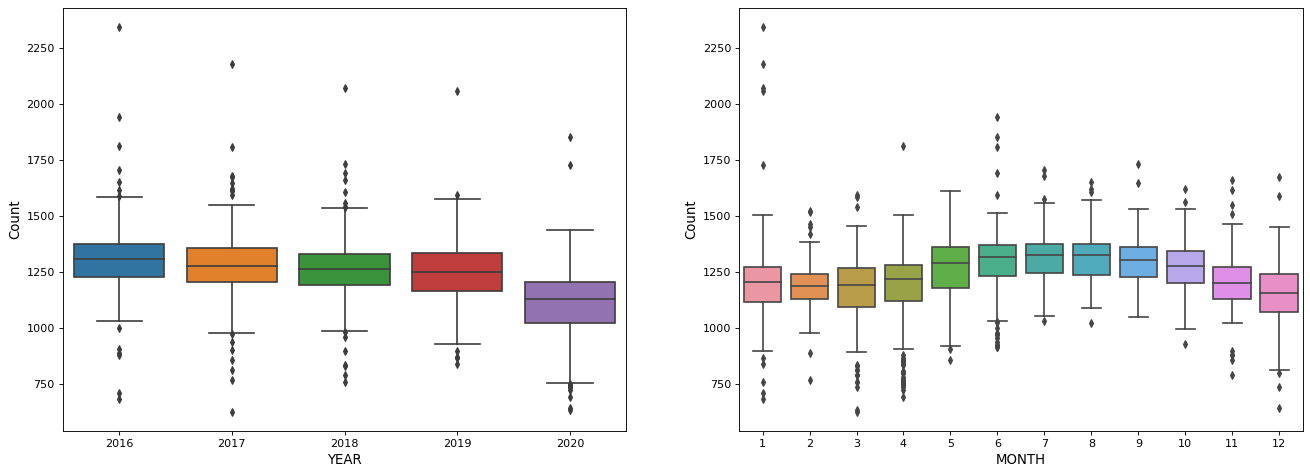

In [37]:
# Draw Plot
import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
x1 = sns.boxplot(x='YEAR', y='size', data=dates_sorted, ax=axes[0])
x2 = sns.boxplot(x='MONTH', y='size', data=dates_sorted)
x1.set_xlabel('YEAR',fontsize=12)
x1.set_ylabel('Count',fontsize=12)
x2.set_xlabel('MONTH',fontsize=12)
x2.set_ylabel('Count',fontsize=12)

Text(0, 0.5, 'Count')

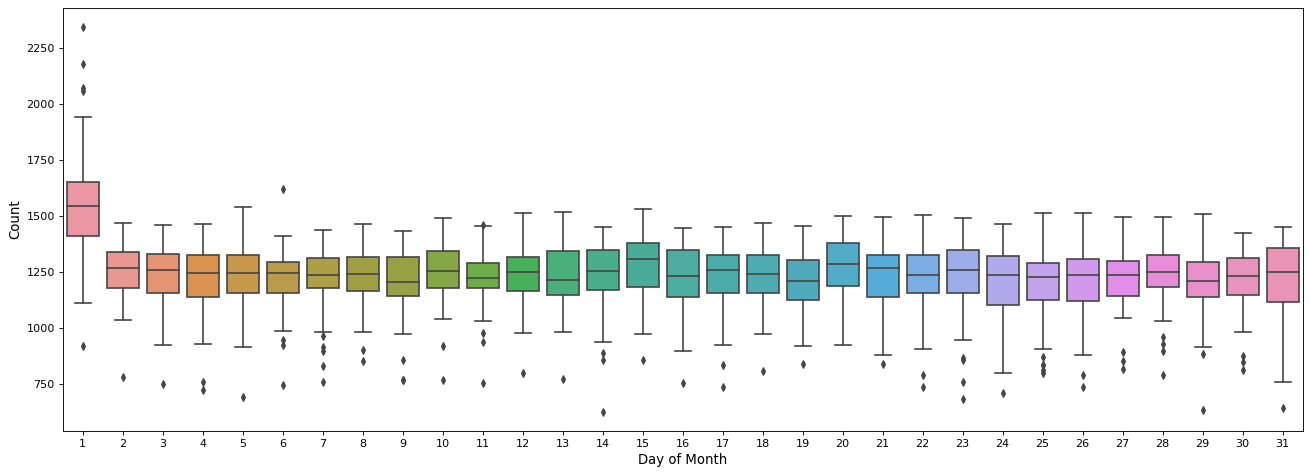

In [38]:
fig, axes = plt.subplots(1, 1, figsize=(20,7), dpi= 80)
x_day = sns.boxplot(x='DAY', y='size', data=dates_sorted)
x_day.set_xlabel('Day of Month',fontsize=12)
x_day.set_ylabel('Count',fontsize=12)

<AxesSubplot:xlabel='Season', ylabel='size'>

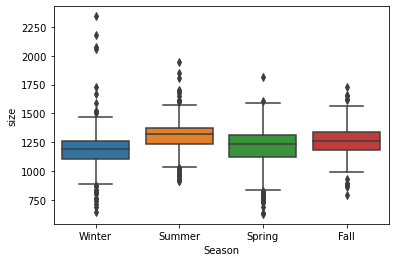

In [39]:
sns.boxplot(x='Season', y='size', data=dates_sorted)